<img style="float: center;" src='https://avatars.githubusercontent.com/u/121973992?s=400&u=0cd6b57216ab047c8b7b93b26a6e91f1d29d719d&v=4' alt="goals_logo" width="90px"/> 

<a id="title_ID"></a>
# CAFE tutorial on 1D spectral fit #

**Authors**: Thomas Lai & Tanio Diaz-Santos
<br>
**Last Updated**: Mar. 20, 2024

## About this Notebook
This notebook demonstrates how CAFE fits a 1D JWST/MIRI spectrum from a Seyfert 1.5 galaxy NGC 7469 detailed in [Lai et al. (2022)](https://ui.adsabs.harvard.edu/abs/2023ApJ...942L..37A/abstract). The spectrum is extracted with a 1.5" radius centered at the nucleus. 

I. One should have CAFE installed. For the installation, please visit the [CAFE Installation Page](https://goals-cafe.readthedocs.io/en/latest/install.html). <br>
II. Download the example spectrum to your local machine. <br>
III. We will fit the spectrum and show how to obtain the results, including the PAH/line fluxes. <br>
IV. We will demonstrate how to retrieve the fitted results from a previous CAFE session. <br>

<hr style="border:1px solid gray"> </hr>

1.<font color='white'>-</font>Imports <a class="anchor" id="intro"></a>
------------------

In [1]:
import os
import sys
import zipfile
import site
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker
from matplotlib.backends.backend_pdf import PdfPages
from astropy.utils.data import download_file

from astropy.io import ascii
from astropy.table import Table
from astropy.table import QTable

import CAFE
import CRETA
from CAFE.cafe_io import *
from CAFE.cafe_helper import *

import CAFE.cafe as cafe
import CRETA.creta as creta

# %matplotlib widget

User API Created


2.<font color='white'>-</font>Download the MIRI IFU extracted 1D spectrum and use it as the input of the CAFE fit<a class="anchor" id="intro"></a>
------------------

In [2]:
# Create folders for input/output data in the current directory
data_path = './input_data/'
cafe_output_path = './cafe_output/'

if not os.path.exists(data_path):
    os.makedirs(data_path)
else:
    print("Input Data folder already exists.")

if not os.path.exists(cafe_output_path):
    os.makedirs(cafe_output_path)
else:
    print("CAFE Output folder already exists.")

Input Data folder already exists.
CAFE Output folder already exists.


### ** Download the spectrum **
Download the NGC 7469 1D spectrum from BOX
https://caltech.box.com/s/ss61vynjd51o5211llrefu9bl2e8mx4z and save the data under ./input_spec/ using the cell below.
<br>


In [3]:
# set the Box link and file name
link = 'https://caltech.box.com/shared/static/ltioy181o3lkwxejizn4qy5bccs0dsc3.dat'
filename = 'NGC7469_SingleExt_r1.5as.dat'
if not os.path.isfile(os.path.join(data_path, filename)):
    print('Downloading {}...'.format(filename))
    demo_file = download_file(link, cache=True)
    # Make a symbolic link using a local name for convenience
    os.symlink(demo_file, os.path.join(data_path, filename))
else:
    print('{} already exists, skipping download...'.format(filename))

NGC7469_SingleExt_r1.5as.dat already exists, skipping download...


2.<font color='white'>-</font>CAFE Configuration <a class="anchor" id="intro"></a>
------------------

In [4]:
# Get CAFE directory from site-packages
cafe_dir = site.getsitepackages()[0]+'/CAFE/'
creta_dir = site.getsitepackages()[0]+'/CRETA/'

3.<font color='white'>-</font>CAFE FITTING <a class="anchor" id="intro"></a>
------------------

In [5]:
# Set the redshift of the source
z = 0.0163

# Setup data directory, file name, and parameter files.
source_fd = data_path
source_fn = 'NGC7469_SingleExt_r1.5as.dat'

inppar_fn = cafe_dir+'inp_parfiles/inpars_jwst_nirspec-miri_AGN.ini'
optpar_fn = cafe_dir+'opt_parfiles/default_opt.cafe'

# Initialize the CAFE fitting module
s = cafe.specmod(cafe_dir)

Spec data: ./input_data/NGC7469_SingleExt_r1.5as.dat
Generating continuum profiles for guess model from the .ini file
Out of 49 lines set to be fitted, 7 returned negative values while guessing their peaks, so they will not be fitted. These are:
['SiVIII_50019' 'SVII_50027' 'FeII_50624' 'SVII_52334' 'MgVII_90090'
 'NaIV_90410' 'CoIII_118900']
If you think this is incorrect, please double check the input redshift and fine tune it
The parameter object has 42 lines (of which 15 have double components), 25 PAHs, 0 extra opacity features, 42 continuum parameters, and the VGRAD parameter
ISRF
ISRF


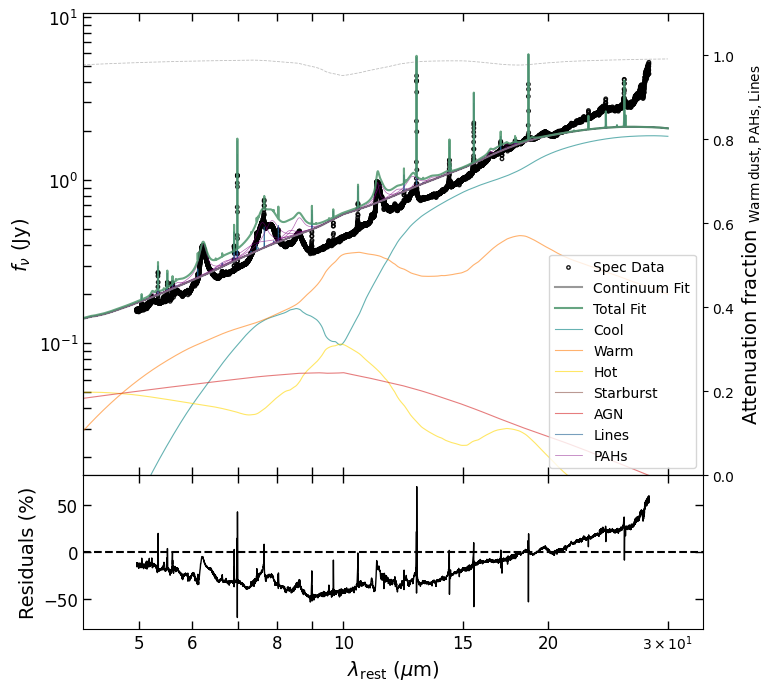

In [6]:
# Read in the spec
s.read_spec(source_fn, file_dir=source_fd, z=z)

# Preview the spectrum and overlay the initial params
s.plot_spec_ini(inppar_fn, optpar_fn)

In [7]:
# Fit the spectrum
s.fit_spec(inppar_fn, optpar_fn, output_path=cafe_output_path)

Generating parameter cube with initial/full parameter object
The parameter object has 49 lines (of which 17 have double components), 25 PAHs, 0 extra opacity features, 42 continuum parameters, and the VGRAD parameter
Generating parameter object
Out of 49 lines set to be fitted, 7 returned negative values while guessing their peaks, so they will not be fitted. These are:
['SiVIII_50019' 'SVII_50027' 'FeII_50624' 'SVII_52334' 'MgVII_90090'
 'NaIV_90410' 'CoIII_118900']
If you think this is incorrect, please double check the input redshift and fine tune it
The parameter object has 42 lines (of which 15 have double components), 25 PAHs, 0 extra opacity features, 42 continuum parameters, and the VGRAD parameter
Generating continuum profiles
ISRF
ISRF
Fitting 127 unfixed parameters, out of the 289 defined in the parameter object
Iteration 1 / 5(max): 2024-03-20 10:31:21.758230 -------------
The fitter reached a solution after 12549 steps in 137.28 seconds
<Parameter 'HOT_TAU', value=5.443929

/Users/thomaslai/opt/anaconda3/envs/cafe_test_2024Mar12/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/thomaslai/opt/anaconda3/envs/cafe_test_2024Mar12/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/thomaslai/opt/anaconda3/envs/cafe_test_2024Mar12/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/thomaslai/opt/anaconda3/envs/cafe_test_2024Mar12/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/thomaslai/opt/anaconda3/env

PAH table is saved in: ./cafe_output/NGC7469_SingleExt_r15as/NGC7469_SingleExt_r15as_pahtable.ecsv
Line table is saved in: ./cafe_output/NGC7469_SingleExt_r15as/NGC7469_SingleExt_r15as_linetable.ecsv


In [8]:
# Line and PAH averaged velocity shift/gradient with respect to the input redshift, in [km/s]
print(s.parcube['VALUE'].data[-1,0,0])

9.702337446813168


ISRF
ISRF


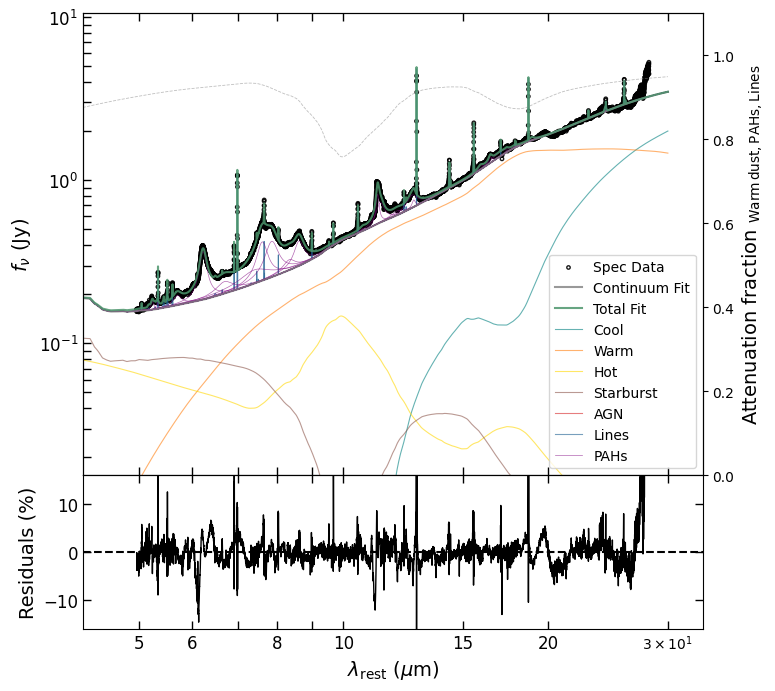

In [9]:
# Plot fitted spectrum
s.plot_spec_fit(inppar_fn, optpar_fn)

# Get PAH and line table from the fit
The PAH/line tables are stored in the cafe_output folder in a .ecsv format. <br>
The fluxes are all in units of W/m^2

One can also display these tables in the notebook by running the cell below. 

In [10]:
# Display the PAH table
display(s.pahs_int)

,pah_strength,pah_strength_unc,pah_complex_eqw
pah_complex,,,
PAH113_C,4.538948e-15,1.385024e-16,0.307044
PAH120,7.803947e-16,9.018113e-17,0.054831
PAH126_C,2.687459e-15,1.107142e-16,0.175279
PAH136,0.000000e+00,0.000000e+00,0.000000
PAH142,5.787867e-17,4.180049e-17,0.003962
PAH164,5.089248e-16,2.441113e-17,0.032164
PAH170_C,2.128088e-15,1.479476e-16,0.149081
PAH62,4.400562e-15,8.922243e-17,0.273392
PAH77_C,1.519210e-14,6.948021e-16,1.105976


In [11]:
# Display the line table
display(s.lines_int)

,line_lam,line_strength,line_strength_unc,line_gamma,line_peak
line_name,,,,,
H200S8_50529N,5.052900,2.367290e-18,1.972114e-18,0.000270,0.013862
NaVIII_51789B,5.172773,2.153661e-17,2.005310e-17,0.006671,0.005233
NaVIII_51789N,5.178900,0.000000e+00,NaN,0.000263,0.000000
SiVIII_52910B,5.284223,1.464089e-17,2.118682e-17,0.005134,0.004723
SiVIII_52910N,5.291000,1.985802e-19,2.564276e-18,0.000257,0.001279
...,...,...,...,...,...
MgVII_90090N,NaN,NaN,NaN,NaN,NaN
SVII_50027N,NaN,NaN,NaN,NaN,NaN
SiVIII_50019B,NaN,NaN,NaN,NaN,NaN


CAFE is based on the lmfit framework, and the lmfit parameters are stored in a parameter cube (parcube), which is based on a fits format. <br>
A specific fitted parameter can be obtained by following the cell below that shows how one can get the opacity ('WRM_TAU') that PAHs and lines are subjected to.

In [12]:
parname = 'WRM_TAU' # input the parameter name 

parobj = parcube2parobj(s.parcube) # Convert the fitted parameters to a lmfit Parameter object 
output = parobj[parname].value

print("{} = {:.4f}".format(parname, output))

WRM_TAU = 0.5829


4.<font color='white'>-</font>RESTORE CAFE SESSION FROM DISK <a class="anchor" id="intro"></a>
------------------
The CAFE session can be restored with the parameter cube (*_parcube.fits) file.

In [13]:
# Set up directories
source_fnb = ''.join(source_fn.split('.')[0:-1])
parcube_fd = cafe_output_path+source_fnb+'/'
parcube_fn = source_fnb+'_parcube.fits'

In [14]:
# Load the parameter cube from disk
s.read_parcube_file(parcube_fn, file_dir=parcube_fd)

Filename: ./cafe_output/NGC7469_SingleExt_r15as/NGC7469_SingleExt_r15as_parcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  VALUE         1 ImageHDU         9   (1, 1, 316)   float64   
  2  STDERR        1 ImageHDU         9   (1, 1, 316)   float64   
  3  VARY          1 ImageHDU         9   (1, 1, 316)   float64   
  4  MIN           1 ImageHDU         9   (1, 1, 316)   float64   
  5  MAX           1 ImageHDU         9   (1, 1, 316)   float64   
  6  EXPR          1 BinTableHDU     13   316R x 2C   [I, 24A]   
  7  PARNAME       1 BinTableHDU     13   316R x 2C   [I, 32A]   


ISRF
ISRF


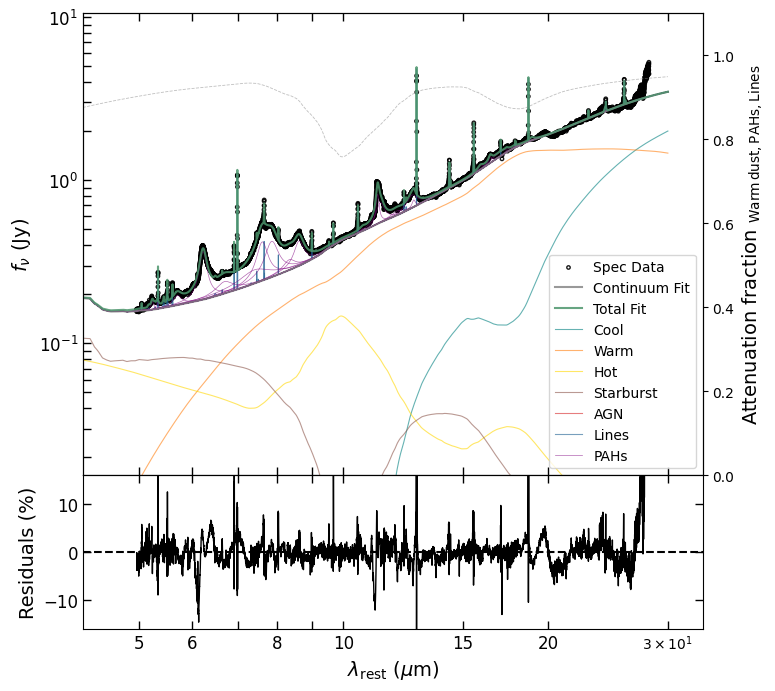

In [15]:
# Plot the previous fit
s.plot_spec_fit(inppar_fn, optpar_fn)

One may want to fit again the spectrum but use as an initial guess the result from the fit of another spectrum
(or from a previous fit from the same spectrum, although this is not recommended as most parameters have been already optimized and that gives trouble to LMFIT). <br>
For this example case, nevertheless, we use the previous fit from the same spectrum

In [16]:
# Note this is technically unnecessary if the initalization is done with the same spectrum, since the parameter cube is already loaded in s.parcube, but for completeness:
ini = cafe.specmod(cafe_dir)
ini.read_parcube_file(parcube_fn, file_dir=parcube_fd)

Filename: ./cafe_output/NGC7469_SingleExt_r15as/NGC7469_SingleExt_r15as_parcube.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  VALUE         1 ImageHDU         9   (1, 1, 316)   float64   
  2  STDERR        1 ImageHDU         9   (1, 1, 316)   float64   
  3  VARY          1 ImageHDU         9   (1, 1, 316)   float64   
  4  MIN           1 ImageHDU         9   (1, 1, 316)   float64   
  5  MAX           1 ImageHDU         9   (1, 1, 316)   float64   
  6  EXPR          1 BinTableHDU     13   316R x 2C   [I, 24A]   
  7  PARNAME       1 BinTableHDU     13   316R x 2C   [I, 32A]   


Generating continuum profiles for guess model from the .ini file
Out of 49 lines set to be fitted, 7 returned negative values while guessing their peaks, so they will not be fitted. These are:
['SiVIII_50019' 'SVII_50027' 'FeII_50624' 'SVII_52334' 'MgVII_90090'
 'NaIV_90410' 'CoIII_118900']
If you think this is incorrect, please double check the input redshift and fine tune it
The parameter object has 42 lines (of which 15 have double components), 25 PAHs, 0 extra opacity features, 42 continuum parameters, and the VGRAD parameter
The initial parameters will be set to the values from the parameter cube provided
The parameter object has 42 lines (of which 15 have double components), 25 PAHs, 0 extra opacity features, 42 continuum parameters, and the VGRAD parameter
ISRF
ISRF


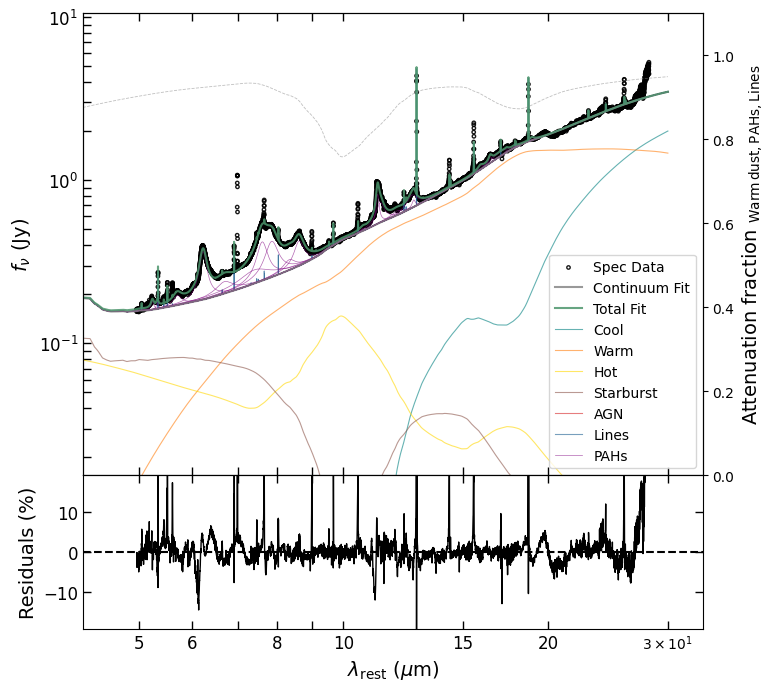

In [17]:
# Plot the initialized spectrum (should be the same as the fitted spectrum above)
s.plot_spec_ini(inppar_fn, optpar_fn, init_parcube=ini.parcube)

In [18]:
# Refit using the last fit results as initialization
s.fit_spec(inppar_fn, optpar_fn, init_parcube=ini.parcube, output_path=cafe_output_path)

Generating parameter cube with initial/full parameter object
The parameter object has 49 lines (of which 17 have double components), 25 PAHs, 0 extra opacity features, 42 continuum parameters, and the VGRAD parameter
Generating parameter object
Out of 49 lines set to be fitted, 7 returned negative values while guessing their peaks, so they will not be fitted. These are:
['SiVIII_50019' 'SVII_50027' 'FeII_50624' 'SVII_52334' 'MgVII_90090'
 'NaIV_90410' 'CoIII_118900']
If you think this is incorrect, please double check the input redshift and fine tune it
The parameter object has 42 lines (of which 15 have double components), 25 PAHs, 0 extra opacity features, 42 continuum parameters, and the VGRAD parameter
The parameters in the parcube provided for initialization will be used to initialize the parameter object
The parameter object has 42 lines (of which 15 have double components), 25 PAHs, 0 extra opacity features, 42 continuum parameters, and the VGRAD parameter
Generating continuum p

/Users/thomaslai/opt/anaconda3/envs/cafe_test_2024Mar12/lib/python3.11/site-packages/CAFE/cafe.py:678: ResourceWarning: unclosed file <_io.BufferedReader name='./cafe_output/NGC7469_SingleExt_r15as/NGC7469_SingleExt_r15as_parcube.fits'>
  self.parcube = parcube


ISRF
Saving total continuum profile in cube to disk: ./cafe_output/NGC7469_SingleExt_r15as/NGC7469_SingleExt_r15as_contcube.fits
Saving init file to disk: ./cafe_output/NGC7469_SingleExt_r15as/NGC7469_SingleExt_r15as_fitpars.ini
Saving parameters in asdf to disk: ./cafe_output/NGC7469_SingleExt_r15as/NGC7469_SingleExt_r15as_cafefit.asdf
Saving figure in png to disk: ./cafe_output/NGC7469_SingleExt_r15as/NGC7469_SingleExt_r15as_fitfigure.png


/Users/thomaslai/opt/anaconda3/envs/cafe_test_2024Mar12/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/thomaslai/opt/anaconda3/envs/cafe_test_2024Mar12/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/thomaslai/opt/anaconda3/envs/cafe_test_2024Mar12/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: divide by zero encountered in divide
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/thomaslai/opt/anaconda3/envs/cafe_test_2024Mar12/lib/python3.11/site-packages/astropy/units/quantity.py:666: RuntimeWarning: invalid value encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/Users/thomaslai/opt/anaconda3/env

PAH table is saved in: ./cafe_output/NGC7469_SingleExt_r15as/NGC7469_SingleExt_r15as_pahtable.ecsv
Line table is saved in: ./cafe_output/NGC7469_SingleExt_r15as/NGC7469_SingleExt_r15as_linetable.ecsv


In [19]:
# Line and PAH averaged velocity gradient wrt z, in [km/s]
print(s.parcube['VALUE'].data[-1,0,0])

9.639463474766538


ISRF
ISRF


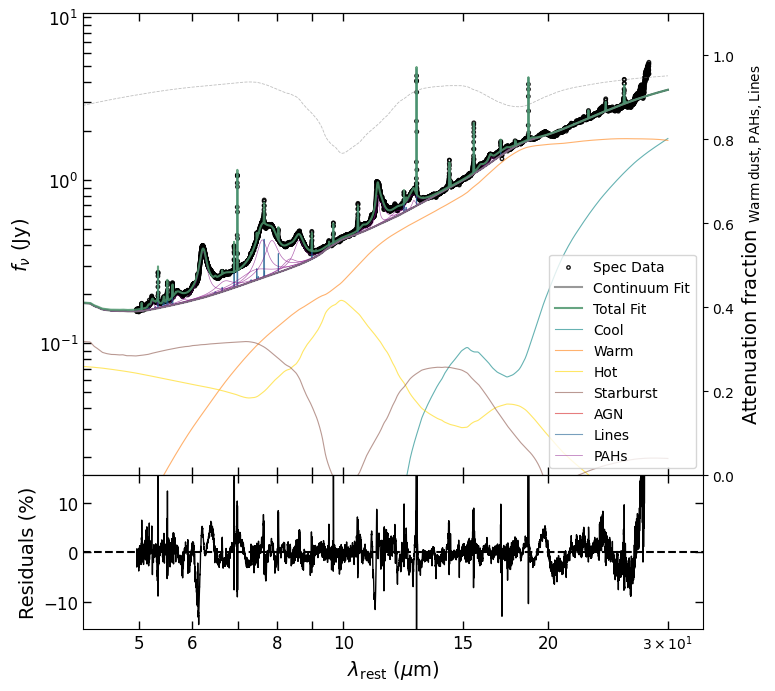

In [20]:
s.plot_spec_fit(inppar_fn, optpar_fn)